In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
from IPython.display import HTML
import numpy as np
import random
import os

from cell_class import Cells
from class_population import Population
from land_dataset_fitness import CellDiff_Dataset_Landscape
from morphogen_regimes import *
from landscape_visuals import *
from helper_func import plot_cell_concentration, get_cell_data, delete_all_images, create_directory_if_not_exists
from landscape_segmentation import Somitogenesis_Landscape  #########
from class_module import Node, UnstableNode, Center, NegCenter

from class_landscape import Landscape
from landscape_visuals import *

seed= 13
save_dir = f'saved_files_{seed}/'

np.random.seed(seed)
from decimal import Decimal, getcontext, ROUND_HALF_UP
getcontext().prec = 6
getcontext().rounding = ROUND_HALF_UP

In [2]:
# Cell Initialization
t0 = 0.
tf = 66.
tc = 40.
div = 40
repl = 10

nt = int(tf*3)
noise_init = 0.5
init_cond=(-9, 3)

cell = Cells(t0 = t0, tf = tf, tc = tc , div = div,repl = repl, nt = nt, init_cond = init_cond)
cell.create_Start_Times()
cell.init_position(noise=noise_init)

In [3]:
fac = 2.5
ai_val = 0.1
af_val = 1.7
si_val = 0.1
sf_val = 1.7

y0 = -3
M1 = Node(x=-3.*fac, y=y0, a=(ai_val, af_val), s=(si_val, sf_val), tau=1.)
M2 = Node(x=-1.*fac, y=y0, a=(ai_val, af_val), s=(si_val, sf_val), tau=1.)
M3 = Node(x= 1.*fac, y=y0, a=(ai_val, af_val), s=(si_val, sf_val), tau=1.)
M4 = Node(x= 3.*fac, y=y0, a=(ai_val, af_val), s=(si_val, sf_val), tau=1.)

module_list = [M1, M2, M3, M4]

for M in module_list:
    print(M)

# -----------------------------------------
# Landscape Initialization
# -----------------------------------------
land = Landscape(cell,module_list, A0 = 0, regime=mr_sigmoid, n_regimes=2, init_cond=(-3*fac-1, 2),
                  morphogen_times=(tc,), tilt_par=(1), tiltx = -0.9, tilty = 0.3, xy= True)

L = 4*fac+2
pl = 2
npoints = 1000
qx = np.linspace(-L,L, npoints)
qy = np.linspace(-L,L, npoints)
xx, yy = np.meshgrid(qx, qy, indexing='xy')

Node at (-7.5, -3), a = [0.1 1.7], s = [0.1 1.7], tau = 1.0
Node at (-2.5, -3), a = [0.1 1.7], s = [0.1 1.7], tau = 1.0
Node at (2.5, -3), a = [0.1 1.7], s = [0.1 1.7], tau = 1.0
Node at (7.5, -3), a = [0.1 1.7], s = [0.1 1.7], tau = 1.0


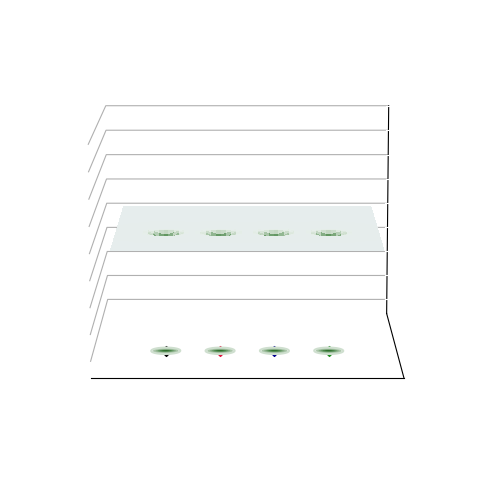

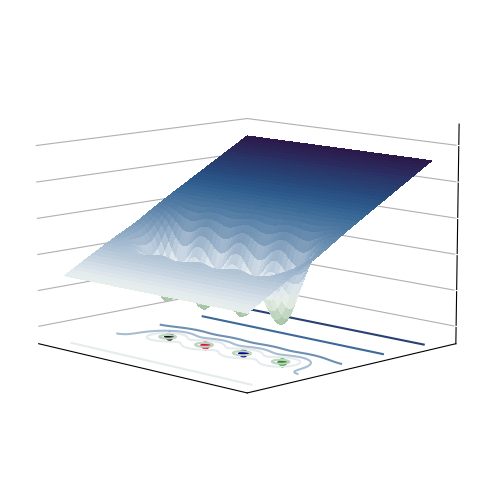

In [7]:
fig = visualize_potential(land, xx, yy, regime=0, color_scheme='order', scatter=True, elev=10, azim=-90)
fig = visualize_potential(land, xx, yy, regime=tc, color_scheme='order', scatter=True, elev=10, azim=-45)

In [4]:
video_landscape(land, xx, yy, traj_times=None, plot_start=0, size_x=4, size_y=4, ndt= nt, noise_init=2., noise_run=0.2, tstep = 0,
                color_scheme='fp_types', colors=None, video_name = 'Land_cells_n', output_dir ='images/', same_time=False, dwl= False)

c:\Python312\Lib\site-packages\matplotlib\streamplot.py:605: RuntimeWarning: overflow encountered in scalar divide
  ds = min(maxds, 0.85 * ds * (maxerror / error) ** 0.5)
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1000, 500) to (1008, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Video saved successfully as images/Land_cells_n.mp4


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\LENOVO\\Documents\\2024-1\\MITACS_Project\\Landscape\\main\\images\\Gif\\0_150_0705.png'

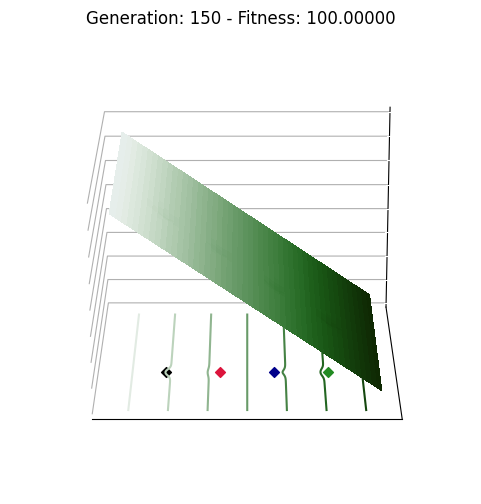

In [5]:
output_gif = f'images/Gif/'
for istep in range(0, int(land.cell.nt) + 1, 2):
        fig = visualize_potential(land, xx, yy, regime= istep, color_scheme='order', scatter=True,
                                elev=20, azim=-90, output_gif = output_gif, igen =150, fit = 100)

In [ ]:
from landscape_visuals import *
output_gif = f'images/Gif/'
create_gif_from_images(output_gif, f'images/potential_time_new.gif', duration=1000)

FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: 'images/Gif/'

# Test

In [2]:
# Cell Initialization
t0 = 0.
tf = 40.
tc = 30.
div = 10 #40
repl = 10
nt = int(tf*3)
noise_init = 0.5
init_cond=(-8, 0)

cell = Cells(t0 = t0, tf = tf, tc = tc , div = div,repl = repl, nt = nt, init_cond = init_cond)
cell.create_Start_Times()
cell.init_position(noise=noise_init)

In [4]:
fac = 2.5
ai_val = 0.1
af_val = 1.6
si_val = 0.1
sf_val = 1.6
#M1 = Node(x=-3.*fac, y=0., a=(ai_val, af_val), s=(si_val, sf_val), tau=1.)
#M2 = Node(x=-1.*fac, y=0., a=(ai_val, af_val), s=(si_val, sf_val), tau=1.)
M3 = Node(x= 1.*fac, y=0., a=(ai_val, af_val), s=(si_val, sf_val), tau=1.)
M4 = Node(x= 3.*fac, y=0., a=(ai_val, af_val), s=(si_val, sf_val), tau=1.)

module_list = [M3, M4]

for M in module_list:
    print(M)

# -----------------------------------------
# Landscape Initialization
# -----------------------------------------
land = Landscape(cell,module_list, A0 = 0, regime=mr_sigmoid, n_regimes=2, init_cond=(-3*fac-1, 2), morphogen_times=(tc,), tilt_par=(0.5),tilt = -0.5)

L = 4*fac+2
pl = 2
npoints = 1000
qx = np.linspace(-L,L, npoints)
qy = np.linspace(-L,L, npoints)
xx, yy = np.meshgrid(qx, qy, indexing='xy')

Node at (2.5, 0.0), a = [0.1 1.6], s = [0.1 1.6], tau = 1.0
Node at (7.5, 0.0), a = [0.1 1.6], s = [0.1 1.6], tau = 1.0


In [5]:
video_landscape(land, xx, yy, traj_times=None, plot_start=0, size_x=4, size_y=4, ndt= nt, noise_init=2., 
                noise_run=0.2, tstep = 0 ,color_scheme='fp_types', colors=None, video_name = 'Land_cells_n',
                  same_time=False, dwl= False, output_dir =f'images/{seed}/')

c:\Python312\Lib\site-packages\matplotlib\streamplot.py:605: RuntimeWarning: overflow encountered in scalar divide
  ds = min(maxds, 0.85 * ds * (maxerror / error) ** 0.5)
c:\Python312\Lib\site-packages\matplotlib\streamplot.py:626: RuntimeWarning: overflow encountered in scalar divide
  dsy = (ny - 1 - yi) / cy
c:\Python312\Lib\site-packages\matplotlib\streamplot.py:624: RuntimeWarning: overflow encountered in scalar divide
  dsy = yi / -cy
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1000, 500) to (1008, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Video saved successfully as images/13/Land_cells_n.mp4


In [6]:
#land.cell.number_attractors()
land.cell.init_position(0.2)
land.run_cells(noise=0.2, ndt=200, same_time=False, measure='gaussian')
land.cell.Prob_Atrrac()
land.cell.Prob_ts()
print('H diversity')
land.cell.H_diver()
print('H div pos')
land.cell.H_div_pos()
print(land.cell.h_div_pos)
print(land.cell.h_diversity)
print(land.cell.num_cells)
print(land.cell.prob_attrac)
print(land.cell.prob_ts)
print(land.cell.unclustered_cells)

H diversity
H div pos
0.19379911871785627
0.7918583525674836
100
[37 48 15]
[[ 0  1  9]
 [ 0  5  5]
 [ 0  9  1]
 [ 0 10  0]
 [ 0 10  0]
 [ 0 10  0]
 [ 7  3  0]
 [10  0  0]
 [10  0  0]
 [10  0  0]]
37


In [20]:
tot = 52 +15
(52/tot)*np.log2(52/tot) + (15/tot)*np.log2(15/tot)

-0.7671903206448684

In [6]:
print(land.cell.States[:,0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [7]:
print(land.cell.States[:,-1])

[1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [11]:
land.cell.Prob_ts()
print(land.cell.prob_ts)

[[ 0  9  1]
 [ 0 10  0]
 [ 0 10  0]
 [ 0 10  0]
 [ 0 10  0]
 [ 0 10  0]
 [ 0 10  0]
 [ 0 10  0]
 [ 2  8  0]
 [ 3  7  0]
 [ 2  8  0]
 [ 5  5  0]
 [ 5  5  0]
 [ 8  2  0]
 [ 9  1  0]
 [10  0  0]
 [10  0  0]
 [10  0  0]
 [10  0  0]
 [10  0  0]]


In [13]:
ci = 0
cf = land.cell.repl
lst = []
for kk in range(land.cell.div):
    lst.append(np.bincount(land.cell.States[ci:cf, -20],minlength=(land.cell.n_attrac + 1))) # [7,9,1]
    ci += land.cell.repl
    cf += land.cell.repl


print(lst)

[array([ 0, 18,  2], dtype=int64), array([ 0, 18,  2], dtype=int64), array([ 0, 19,  1], dtype=int64), array([ 0, 20,  0], dtype=int64), array([ 0, 20,  0], dtype=int64), array([ 0, 20,  0], dtype=int64), array([ 0, 20,  0], dtype=int64), array([ 1, 19,  0], dtype=int64), array([ 0, 20,  0], dtype=int64), array([ 5, 15,  0], dtype=int64), array([ 9, 11,  0], dtype=int64), array([15,  5,  0], dtype=int64), array([17,  3,  0], dtype=int64), array([17,  3,  0], dtype=int64), array([20,  0,  0], dtype=int64), array([19,  1,  0], dtype=int64), array([20,  0,  0], dtype=int64), array([20,  0,  0], dtype=int64), array([20,  0,  0], dtype=int64), array([20,  0,  0], dtype=int64)]


# Old code

In [2]:
# Cell Initialization
from cell_class import Cells


t0 = 0.
tf = 80.
tc = 60.
div = 40 #40 cells
repl = 20 #20 replicates
#Total num cell = 40*20 = 800
nt = int(tf*3)
noise_init = 0.5
init_cond=(-8, 0)
W_H_d = 0.5
W_H_dp = 1.5

cell = Cells(t0 = t0, tf = tf, tc = tc , div = div,repl = repl, nt = nt, init_cond = init_cond, W_H_d = 0.5, W_H_dp = 1.5)
cell.create_Start_Times()
cell.init_position(noise=noise_init)

In [3]:
time_pars = (t0, tf, nt)
morphogen_times = (tc,)

par_limits = {
    'x': (-10.,10.),
    'y': (-7., 7.),
    'a': (0.2,3.),
    's': (0.2, 2)
}

par_choice_values = {
    'tau': (5.,),
    'tilt_lmt': (-0.41, -0.01),
}

landscape_pars = {
    'A0': 0.00005,
    'init_cond': (0., 0.),
    'regime': mr_sigmoid,
    'n_regimes': 2,
    'morphogen_times': morphogen_times,
    'used_fp_types': (Node,),
    'immutable_pars_list': [],
    'tilt': -0.35,
    'tilt_par': (0.5)
}

prob_pars = {
    'prob_tilt': 0.10,
    'prob_add': 0.15,
    'prob_drop': 0.15,
    'prob_shuffle': 0.
    # the rest is mutation of parameters
}

fitness_pars = {
    'ncells': 50,
    'time_pars': time_pars,
    'init_state': (0., 0.),
    't0_shift': 0.5,  # shift (delay) of the time of transition between 2 neighbor cells
    'noise': 0.3,
    'low_value': -1.,
    'high_value': 1.,
    'penalty_weight': 0.1,
    't_stable': 5, # how many timepoints should be at steady state
    'ndt': 50,
    'tilt': (-0.001, -0.4)
}

In [5]:
#  Starting with 2 random nodes, then any modules can be added or deleted
start_module_list = [Node.generate(par_limits, par_choice_values, n_regimes=2) for i in range(3)]

# Population size should be even, adjust N to your computing capacity
N = 16
P = Population(cell = cell,N = N, problem_type = Somitogenesis_Landscape, landscape_pars = landscape_pars, prob_pars = prob_pars, fitness_pars = fitness_pars, par_limits = par_limits, par_choice_values = par_choice_values, start_module_list = start_module_list)

plt.imshow(P.landscape_list[0].result, cmap='Blues')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Space)', fontsize=12)
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (40,) + inhomogeneous part.

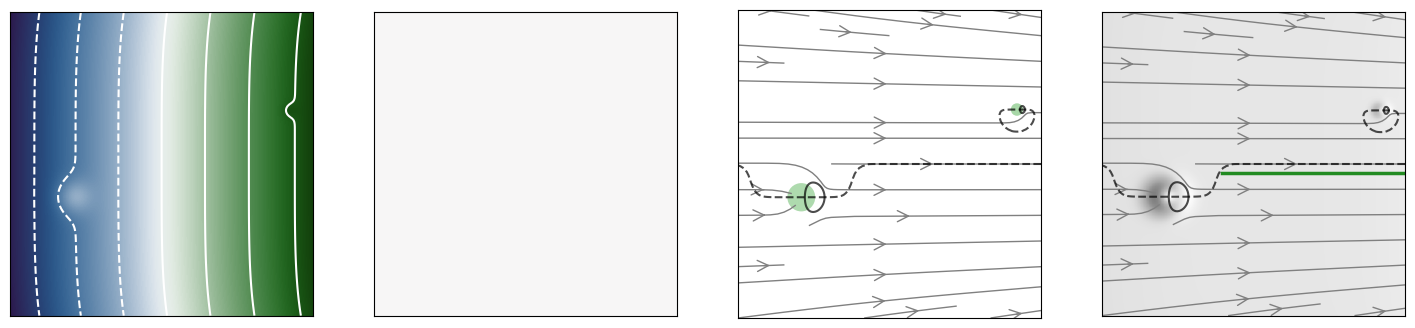

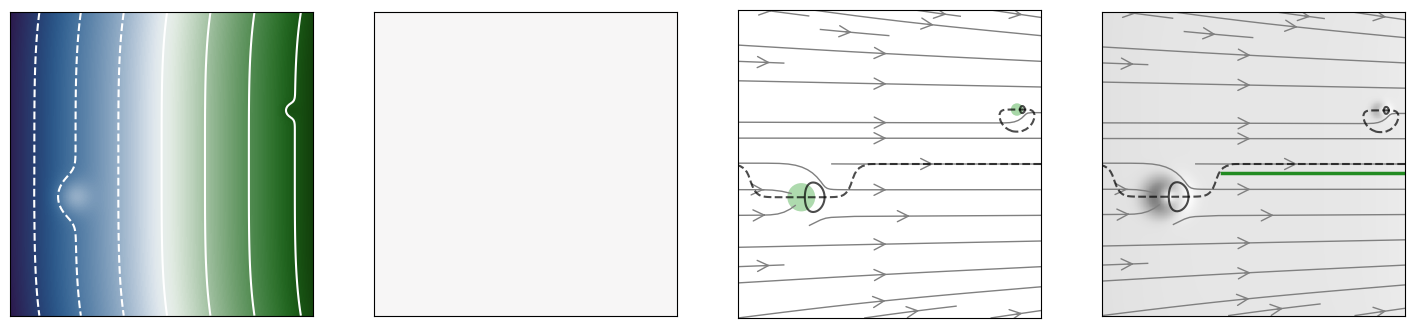

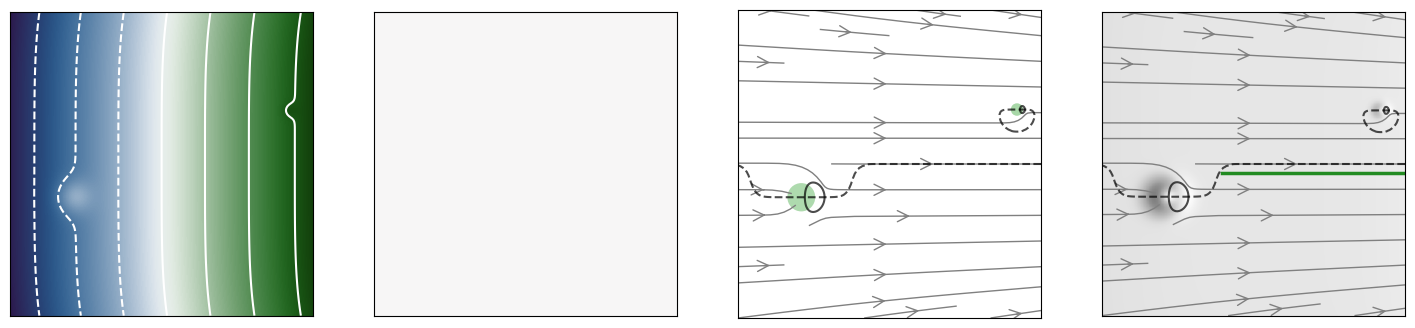

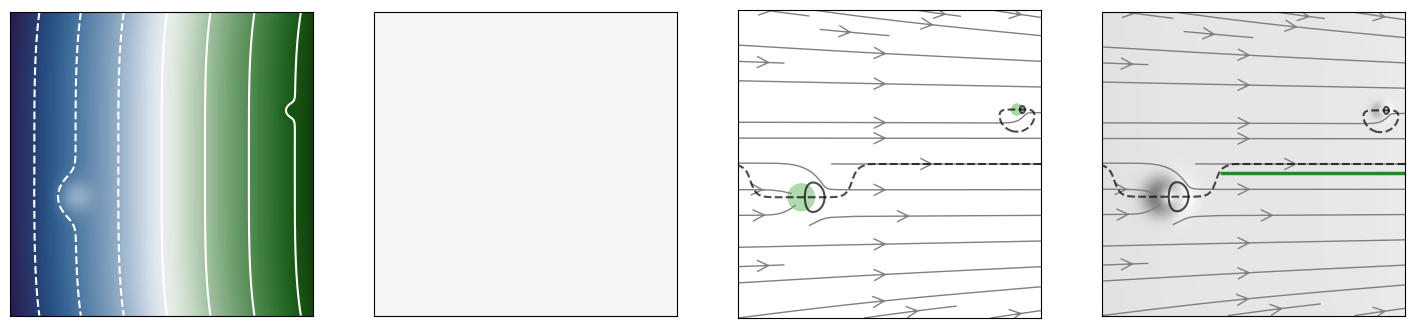

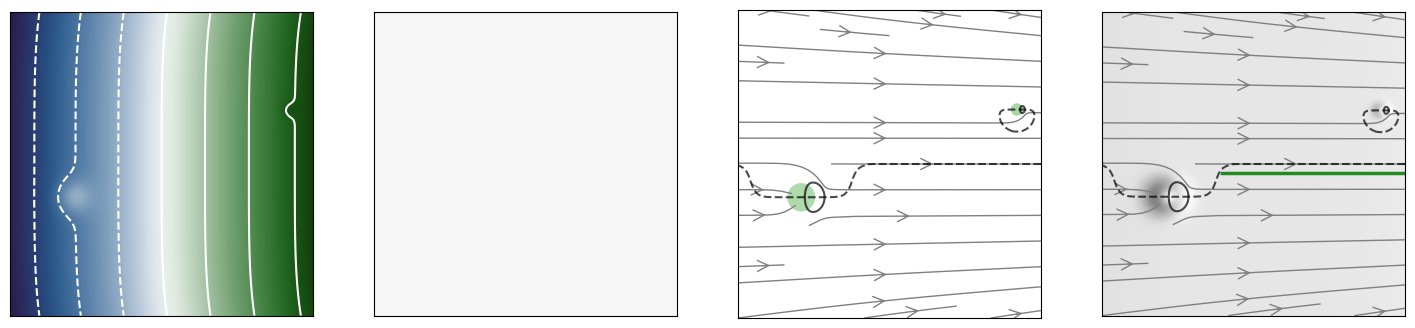

In [ ]:
landscape = P.landscape_list[0]

L = 10.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q, q, indexing='xy')
times = np.array((-5,-2, 0, 2, 5,))
dX, dY = visualize_all(landscape, xx, yy, times, density=0.45, color_scheme='fp_types', plot_traj=True,
                             traj_init_cond=(0., 0.), traj_times=(0., 25., 251))

In [8]:
print(P.landscape_list[0])

Landscape with modules:
Node at (-5.94892, -4.09108), a = [2.07742 2.77055], s = [1.5972  1.49051], tau = 5.0,
Node at (-8.29312, 4.81829), a = [2.26199 2.06547], s = [1.82358 1.57212], tau = 5.0,
Node at (-7.82871, 2.57546), a = [0.27357 2.52904], s = [0.2124  1.97314], tau = 5.0


Directory 'images/5/' created.
Directory 'images/5/evo/' created.
Directory 'images/5/Gif/' created.
Directory 'images/5/Cells/' created.
Timecode: 20240807-123459
Generation: 0
Generation: 10
Generation: 20
Generation: 30
Generation: 40
Generation: 50
Generation: 60
Generation: 70
Generation: 80
Generation: 90
Generation: 100
Generation: 110
Generation: 120
Generation: 130
Generation: 140
Generation: 150
Generation: 160
Generation: 170
Generation: 180
Generation: 190
Best fitness: 0.28453580748814955
Done


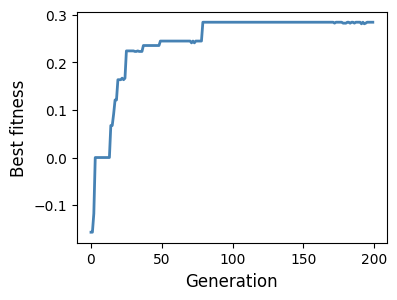

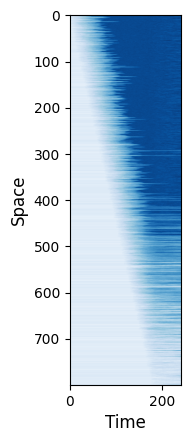

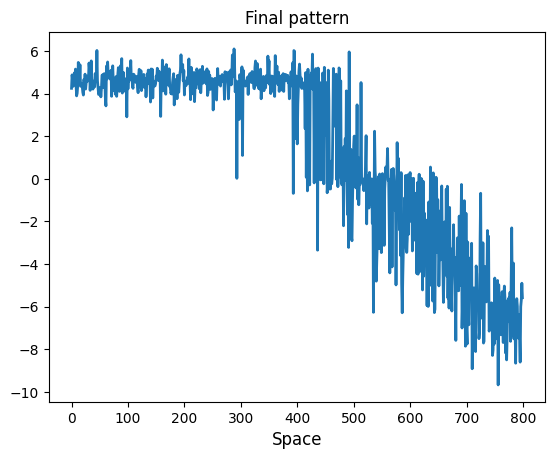

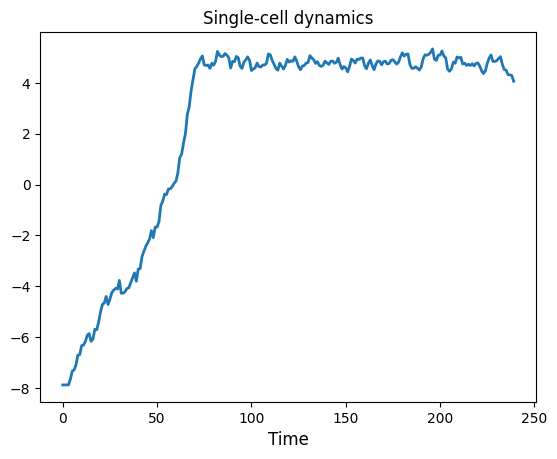

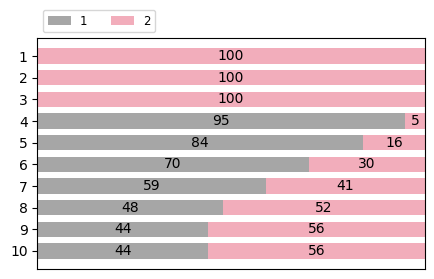

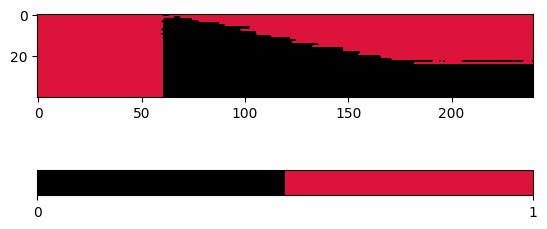

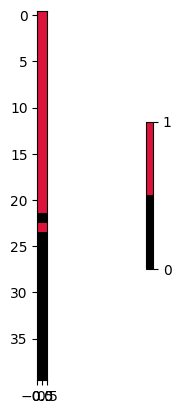

Landscape with modules:
Node at (-0.12224, 3.83209), a = [1.96776 0.72585], s = [0.2124  1.39024], tau = 5.0,
Node at (4.65278, 0.81935), a = [2.40907 0.31164], s = [1.80975 0.73128], tau = 5.0


In [9]:
create_directory_if_not_exists(f"images/{seed}/")
create_directory_if_not_exists(f'images/{seed}/evo/')
create_directory_if_not_exists(f'images/{seed}/Gif/')
create_directory_if_not_exists(f'images/{seed}/Cells/')

fitness_traj = P.evolve_parallel(200, fitness_pars, save_dir, save_each=5, output_dir = f'images/{seed}/evo/')
print('Done')

output_dir = f"images/{seed}/"

plt.figure(figsize=(4,3))
plt.plot(fitness_traj, lw=2, c='steelblue')
plt.xlabel('Generation', fontsize=12)
plt.ylabel('Best fitness', fontsize=12)
# plt.ylim((-2,0))
output_path = os.path.join(output_dir, f"Generation_BF.png")
plt.savefig(output_path)
plt.show()

plt.imshow(P.landscape_list[0].result, cmap='Blues')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Space', fontsize=12)
output_path = os.path.join(output_dir, f"Time_Space.png")
plt.savefig(output_path)
plt.show()

plt.plot(P.landscape_list[0].result[:, -1], lw=2)
plt.title('Final pattern', fontsize=12)
plt.xlabel('Space', fontsize=12)
output_path = os.path.join(output_dir, f"FinalPattern.png")
plt.savefig(output_path)
plt.show()

plt.plot(P.landscape_list[0].result[20, :], lw=2)
plt.title('Single-cell dynamics', fontsize=12)
plt.xlabel('Time', fontsize=12)
output_path = os.path.join(output_dir, f"SCdynamics.png")
plt.savefig(output_path)
plt.show()

P.landscape_list[0].cell.get_data_concentration()
cell_data = P.landscape_list[0].cell.data_States
plot_cell_concentration(cell_data, output_dir= output_dir)

visualize_div_time(P.landscape_list[0], output_dir= output_dir)

visualize_last_div_time(P.landscape_list[0], output_dir= output_dir)

print(P.landscape_list[0])

In [10]:
create_gif_from_images(f'images/{seed}/evo/', f'images/{seed}/Land_evo.gif', duration=700)
delete_all_images(f'images/{seed}/evo/', '*.png')

GIF saved to images/5/Land_evo.gif


In [11]:
L = 11.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q, q, indexing='xy')
output_gif = f'images/{seed}/Gif/'
for istep in range(0, int(P.landscape_list[0].cell.nt) + 1, 2):
    fig = visualize_potential(P.landscape_list[0], xx, yy, regime= istep, color_scheme='order', scatter=True,
                               elev=20, azim=-90, output_gif = output_gif, igen =150, fit = P.landscape_list[0].fitness)

create_gif_from_images(output_gif, f'images/{seed}/potential_time.gif', duration=1000)

GIF saved to images/5/potential_time.gif


In [12]:
video_landscape(P.landscape_list[0], xx, yy, traj_times=None, plot_start=0, size_x=4, size_y=4, ndt= nt, noise_init=2., 
                noise_run=0.2, tstep = 0 ,color_scheme='fp_types', colors=None, video_name = 'Land_cells_n',
                  same_time=False, dwl= False, output_dir =f'images/{seed}/')

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1000, 500) to (1008, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Video saved successfully as images/5/Land_cells_n.mp4
